In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
df=pd.read_csv( r'C:\Users\karta\OneDrive\Desktop\Netflix-data analysis\netflix_titles.csv.zip')
print ('exploring the data set\n', df.head())
print('information of the data set\n',df.info())
print('description of the data set\n',df.describe())
df.isnull().sum()


exploring the data set
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Se

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
#handle missing values

df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
#check result
print(df['date_added'].head(10))
print(df["date_added"].isnull().sum())


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]
98


C:\Users\karta\AppData\Local\Temp\ipykernel_18552\3925601712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='coolwarm')


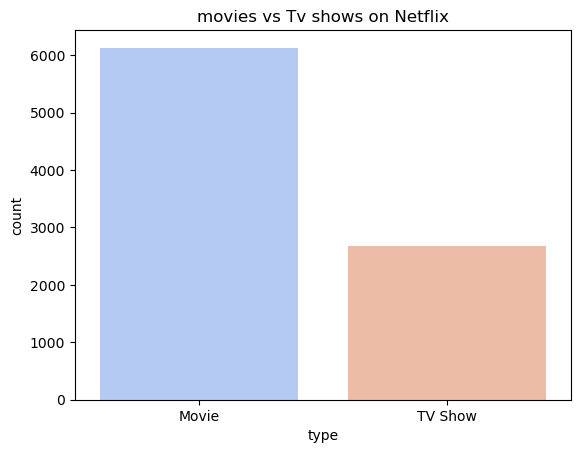

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='type',palette='coolwarm')
plt.title('movies vs Tv shows on Netflix')
plt.show()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


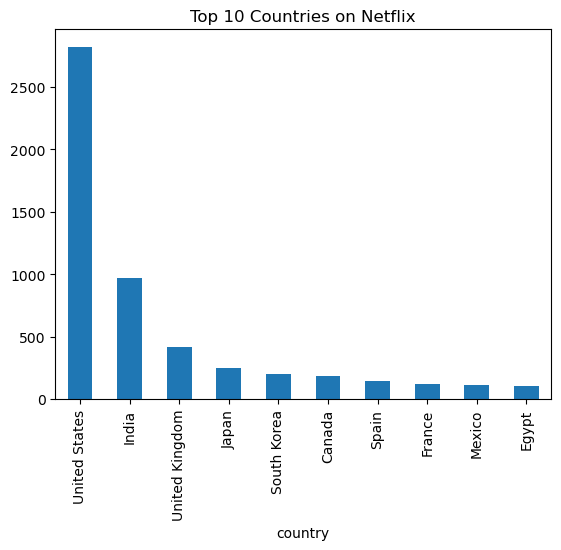

In [59]:
#top 10 countries producing content
contentinnumber=df['country'].value_counts()
print(contentinnumber)
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 countries on netflix')
plt.show 
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries on Netflix")
plt.show()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64


C:\Users\karta\AppData\Local\Temp\ipykernel_18552\2449695597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index,x=top_genres.values,palette="viridis")


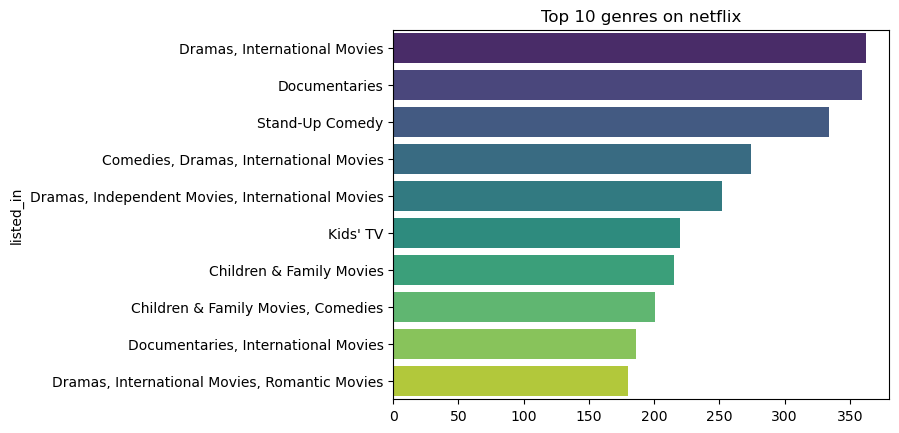

In [63]:
#top 10 genre
topgenreinnumber =df['listed_in'].value_counts()
print(topgenreinnumber)
top_genres=df['listed_in'].value_counts().head(10)
sns.barplot(y=top_genres.index,x=top_genres.values,palette="viridis")
plt.title('Top 10 genres on netflix')
plt.show()


date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64


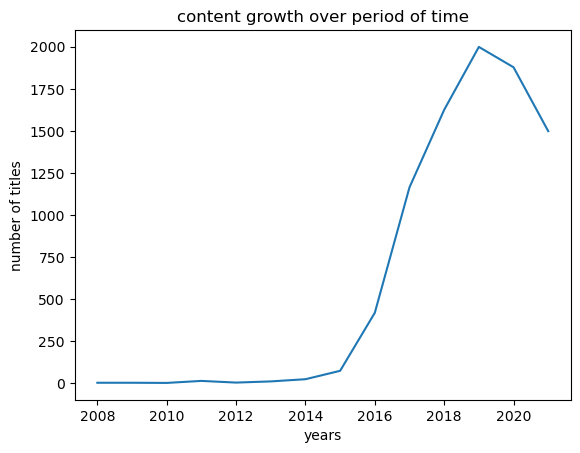

In [82]:
#content growth overtime

growthinnumber=df['date_added'].value_counts()
print(growthinnumber)
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('content growth over period of time')
plt.xlabel('years')
plt.ylabel('number of titles')
plt.show()


['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min']


C:\Users\karta\AppData\Local\Temp\ipykernel_18552\3160355350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num']=movies['duration'].str.replace('min','',regex=False).replace('', np.nan).astype(float)


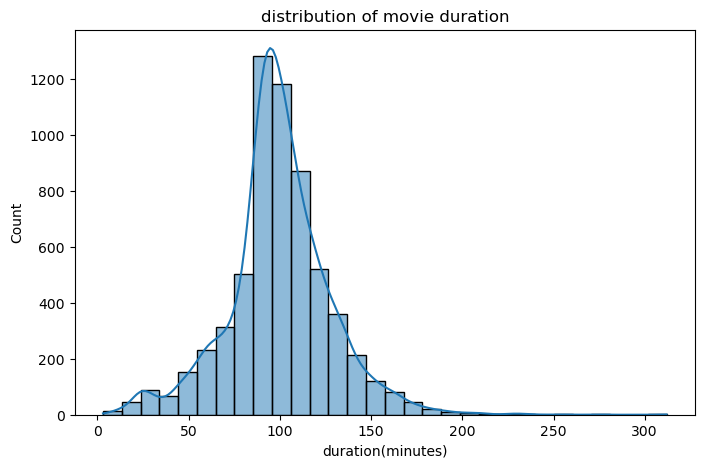

In [97]:
#movie duration
print(movies['duration'].unique()[:20])
import numpy as np 
movies=df[df['type']=='Movie']
movies['duration_num']=movies['duration'].str.replace('min','',regex=False).replace('', np.nan).astype(float)
movies=movies.dropna(subset=['duration_num'])
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'],bins=30,kde=True)
plt.title('distribution of movie duration')
plt.xlabel('duration(minutes)')
plt.show()


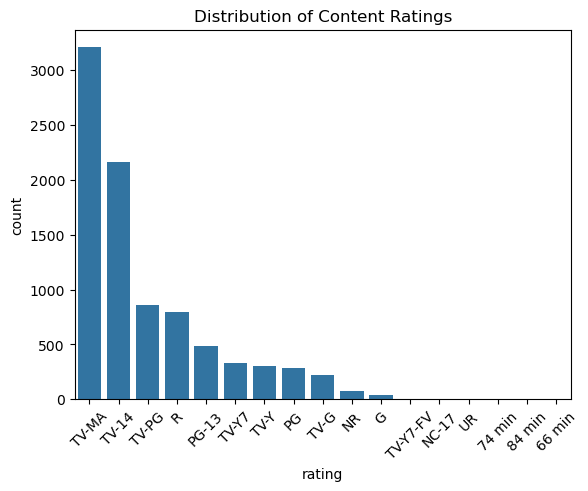

In [99]:
#rating distribution
sns.countplot(data=df, x="rating", order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xticks(rotation=45)
plt.show()